# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Create a dataset

In [2]:
X, y = make_regression(n_samples=4, n_features=1, n_informative=1, noise=80, random_state=13)

In [3]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [4]:
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

# Linear Regression (OLS)

## Scatter Plot of X vs y

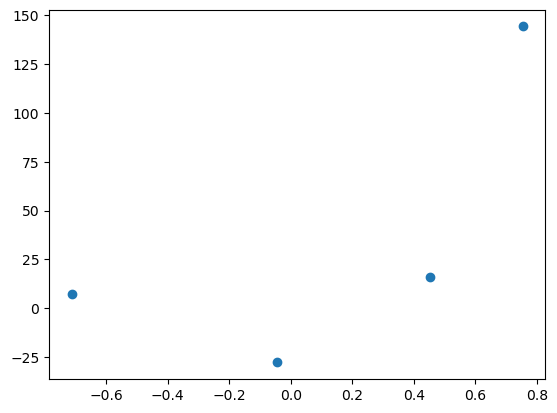

In [5]:
plt.scatter(X, y)
plt.show()

## Fit the model

In [6]:
reg = LinearRegression()

In [7]:
reg.fit(X, y)

LinearRegression()

## Slope and Intercept

In [8]:
reg.coef_

array([78.35063668])

In [9]:
reg.intercept_

26.15963284313262

## Visualize best fit line

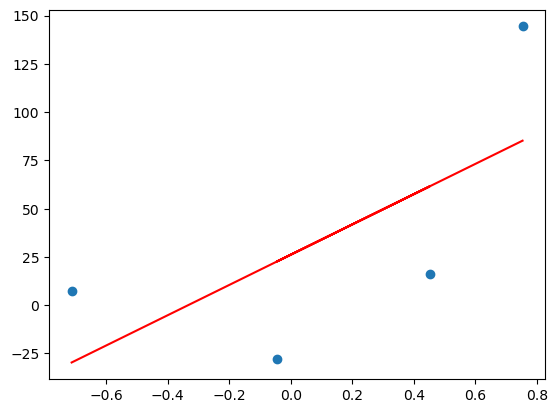

In [10]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red');

# Linear Regression (Gradient Descent)

In [11]:
# Assume slope is constant (m = 78.35) and let's set the starting value of intercept to 0 (b = 0).
y_pred = ((78.35 * X) + 100).reshape(4)
y_pred

array([ 44.18419163, 135.39949674,  96.51318381, 159.05759577])

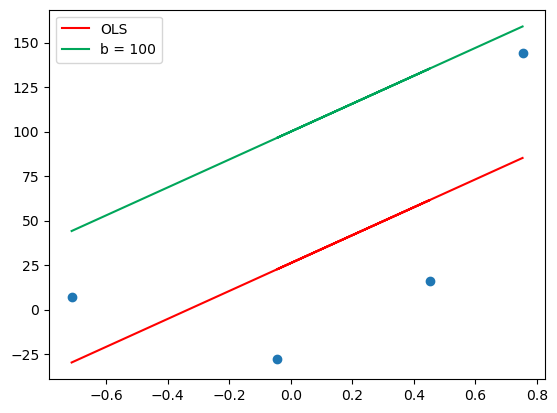

In [12]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred, color='#00a65a', label='b = 100')
plt.legend()
plt.show()

- Target - move the green line closer to red.

## Gradient Descent

### Step 1 - Slope at b = 100

In [13]:
type(X)

numpy.ndarray

- ravel() - used to flatten multi-dimensional array to 1-D array

In [14]:
m = 78.35
b = 100

# slope  = - 2 * sigma (yi - mxi - b)
loss_slope = - 2 * np.sum(y - m * X.ravel() - b)
print('Slope at b = 0: ', loss_slope)

Slope at b = 0:  590.7223659179078


### Step 2 - Calculate the value of new intercept (b)

In [15]:
lr = 0.1

# Calculate Step Size
step_size = loss_slope * lr
print('Step Size: ', step_size)

# Calculate the value of new intercept
b = b - step_size
print('New Intercept: ', b)

Step Size:  59.072236591790784
New Intercept:  40.927763408209216


### Step 3 - Plot the best fit line

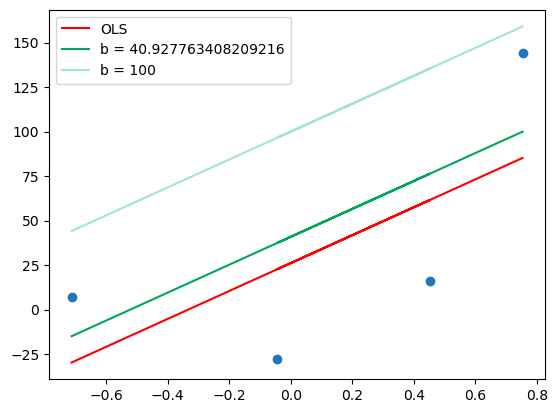

In [16]:
y_pred1 = ((78.35 * X + 40.92)).reshape(4)

plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred1, color='#00a65a', label='b = {}'.format(b))
plt.plot(X, y_pred, color='#A3E4D7', label='b = 100')
plt.legend()
plt.show()

### Step 4 - Repeat Steps 1 to 3 (Iteration 2) 

In [17]:
loss_slope = -2 * np.sum(y - m * X.ravel() - b)
print(f'Slope at b = {0}'.format(b), loss_slope)

Slope at b = 0 118.14447318358157


In [18]:
lr = 0.1

# Calculate Step Size
step_size = loss_slope * lr
print('Step Size: ', step_size)

# Calculate the value of new intercept
b = b - step_size
print('New Intercept: ', b)

Step Size:  11.814447318358157
New Intercept:  29.11331608985106


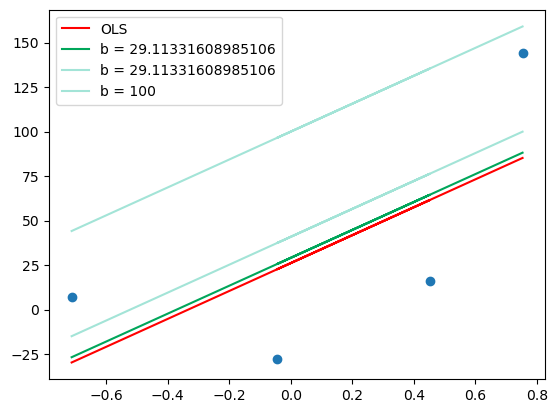

In [19]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 100')
plt.legend()
plt.show()

### Step 5 - Repeat Steps 1 to 3 (Iteration 2) 

In [20]:
loss_slope = -2 * np.sum(y - m * X.ravel() - b)
print(f'Slope at b = {0}'.format(b), loss_slope)

Slope at b = 0 23.62889463671634


In [21]:
lr = 0.1

# Calculate Step Size
step_size = loss_slope * lr
print('Step Size: ', step_size)

# Calculate the value of new intercept
b = b - step_size
print('New Intercept: ', b)

Step Size:  2.362889463671634
New Intercept:  26.750426626179426


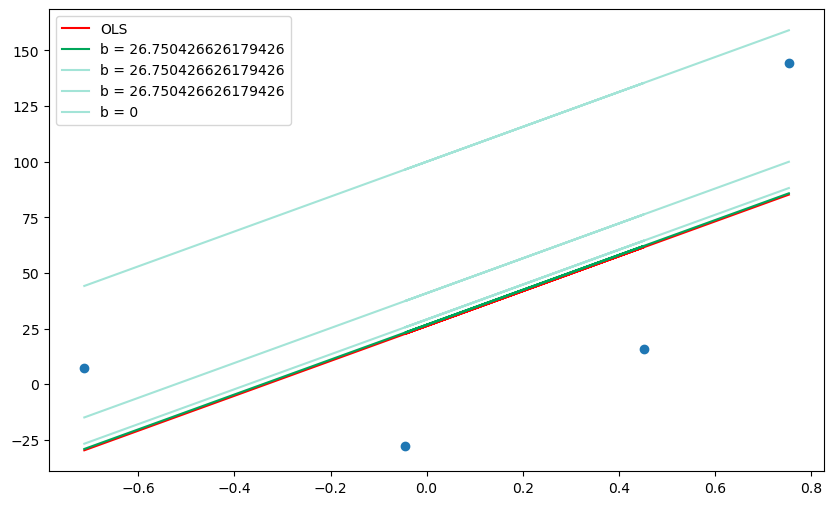

In [22]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

## Gradient Descent (Loop)

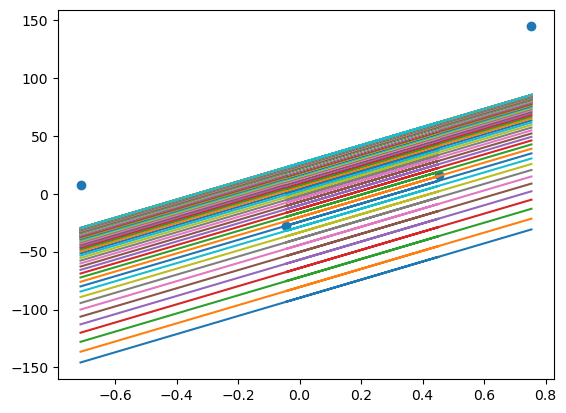

In [23]:
b = -100
m = 78.35
lr = 0.01
epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m * X.ravel() - b)
  step_size = loss_slope * lr
  b = b - step_size
    
  y_pred = m * X + b
  plt.plot(X, y_pred)

plt.scatter(X, y)
plt.show()